In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Tackling id

In [7]:
df['id']

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21592     263000018
21593    6600060120
21594    1523300141
21595     291310100
21596    1523300157
Name: id, Length: 21597, dtype: int64

In [8]:
df['id'].value_counts()

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64

In [9]:
df[df['id'] == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250


In [10]:
df[df.duplicated('id', keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


In [11]:
35300/21597

1.6344862712413761

#### since overall id's contribution to entire dataset is 1.63%, so I am dropping it.

In [12]:
df.drop(columns=['id'], inplace=True)

In [13]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Tackling Date

In [14]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

- Date is of object type. I will extract year, month, and date as integer.

In [15]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [16]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [17]:
# Extract year, month, and day into separate columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [18]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


In [19]:
df.drop(columns=['date'], inplace=True)

In [20]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [22]:
# Convert columns to int32
df['bedrooms'] = df['bedrooms'].astype('int32')
df['sqft_living'] = df['sqft_living'].astype('int32')
df['sqft_lot'] = df['sqft_lot'].astype('int32')
df['waterfront'] = df['waterfront'].astype('int32')
df['view'] = df['view'].astype('int32')
df['condition'] = df['condition'].astype('int32')
df['grade'] = df['grade'].astype('int32')
df['sqft_above'] = df['sqft_above'].astype('int32')
df['sqft_basement'] = df['sqft_basement'].astype('int32')
df['yr_built'] = df['yr_built'].astype('int32')
df['yr_renovated'] = df['yr_renovated'].astype('int32')
df['zipcode'] = df['zipcode'].astype('int32')
df['sqft_living15'] = df['sqft_living15'].astype('int32')
df['sqft_lot15'] = df['sqft_lot15'].astype('int32')
df['bathrooms'] = df['bathrooms'].astype('float32')
df['floors'] = df['floors'].astype('float32')
df['price'] = df['price'].astype('float32')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float32
 1   bedrooms       21597 non-null  int32  
 2   bathrooms      21597 non-null  float32
 3   sqft_living    21597 non-null  int32  
 4   sqft_lot       21597 non-null  int32  
 5   floors         21597 non-null  float32
 6   waterfront     21597 non-null  int32  
 7   view           21597 non-null  int32  
 8   condition      21597 non-null  int32  
 9   grade          21597 non-null  int32  
 10  sqft_above     21597 non-null  int32  
 11  sqft_basement  21597 non-null  int32  
 12  yr_built       21597 non-null  int32  
 13  yr_renovated   21597 non-null  int32  
 14  zipcode        21597 non-null  int32  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int32  
 18  sqft_l

___
#### Memory usage is reduced from *3.4 MB*  to *2.0 MB*
___

# EDA

<Axes: >

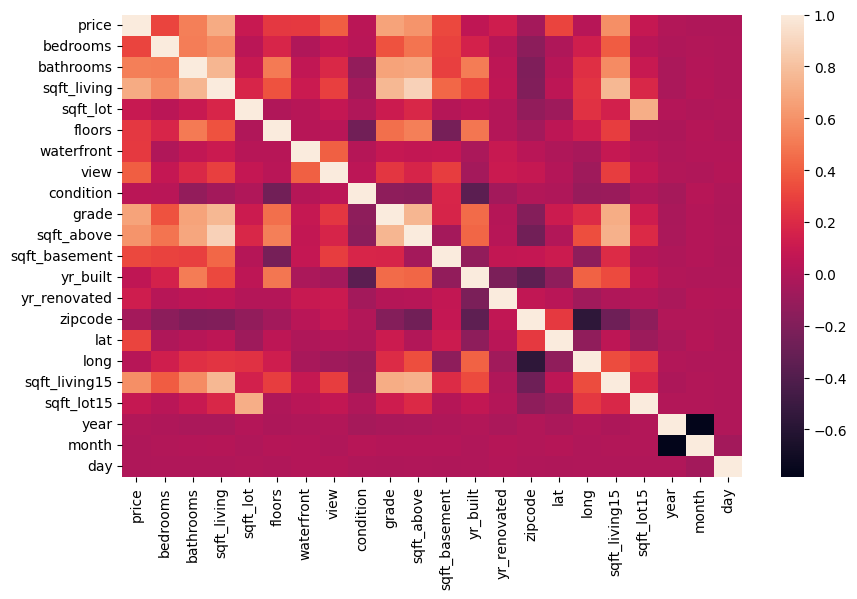

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [25]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
year             0.003727
month           -0.009928
day             -0.014684
zipcode         -0.053402
Name: price, dtype: float64

### Price heavily depends on the following data:
- sqft_living      0.701917
- grade            0.667951
- sqft_above       0.605368
- sqft_living15    0.585241
- bathrooms        0.525906
- view             0.397370
- sqft_basement    0.323799
- bedrooms         0.308787
- lat              0.306692
- waterfront       0.266398
- floors           0.256804

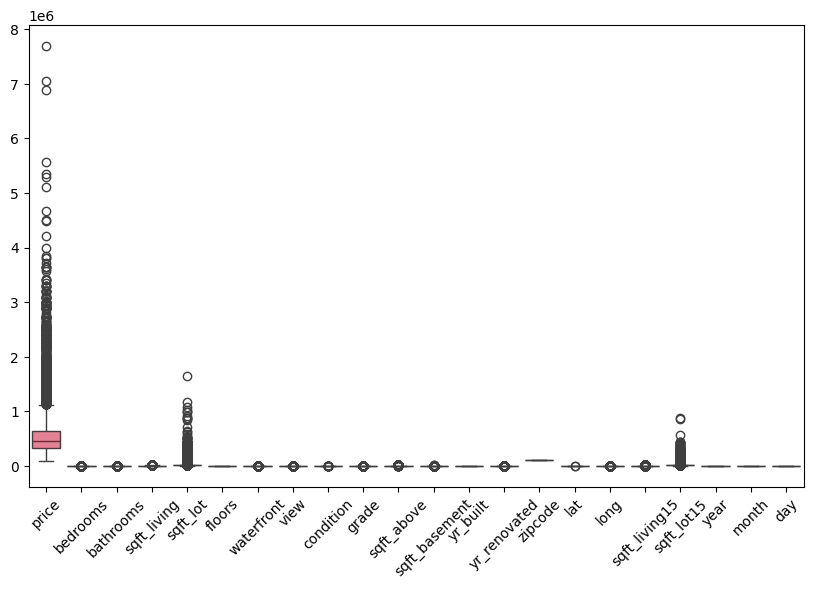

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

### Removing Outliers

<Axes: xlabel='price', ylabel='Count'>

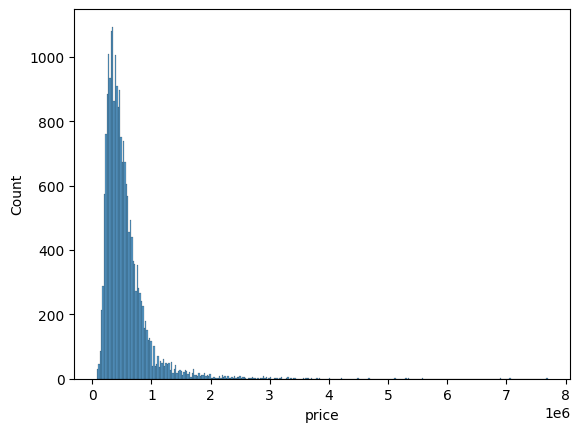

In [27]:
sns.histplot(x = df['price'])

In [28]:
df_filtered = df[df['price'] <= 2000000]

<Axes: xlabel='price', ylabel='Count'>

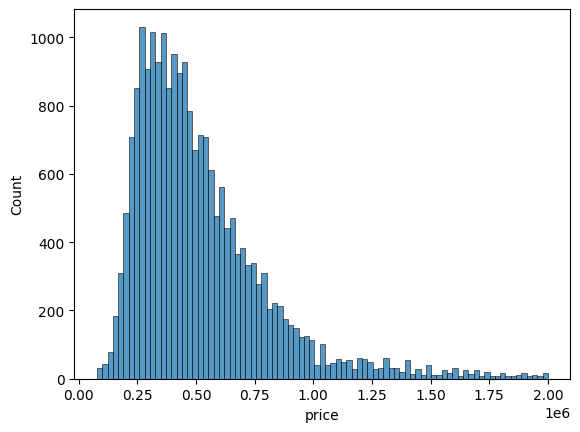

In [29]:
sns.histplot(x=df_filtered['price'])

#### In future, I will use log of price so that i can remove its left skew nature and make it more normal distribution and use that to train the model and compare accuracy

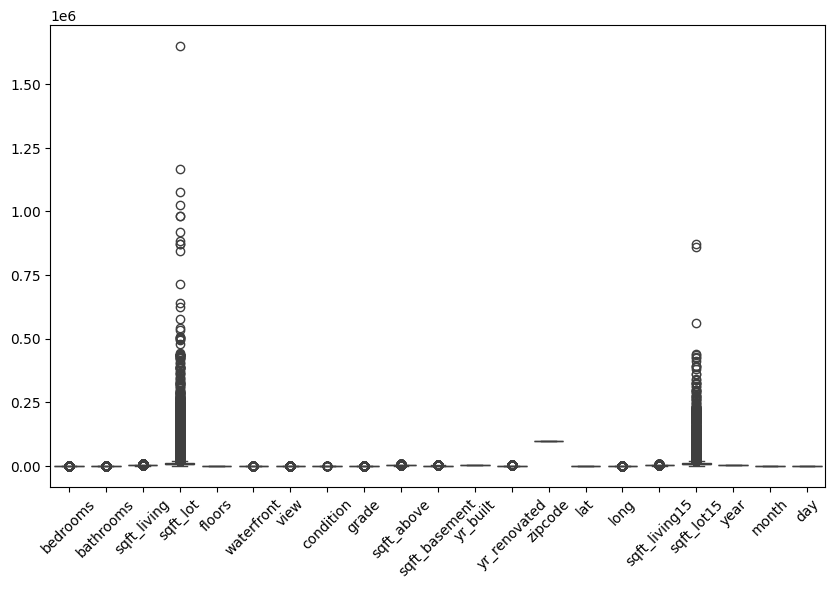

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(df_filtered.drop(columns=['price']))
plt.xticks(rotation=45)
plt.show()

In [31]:
df_filtered = df_filtered[df_filtered['sqft_living'] <= 5500]

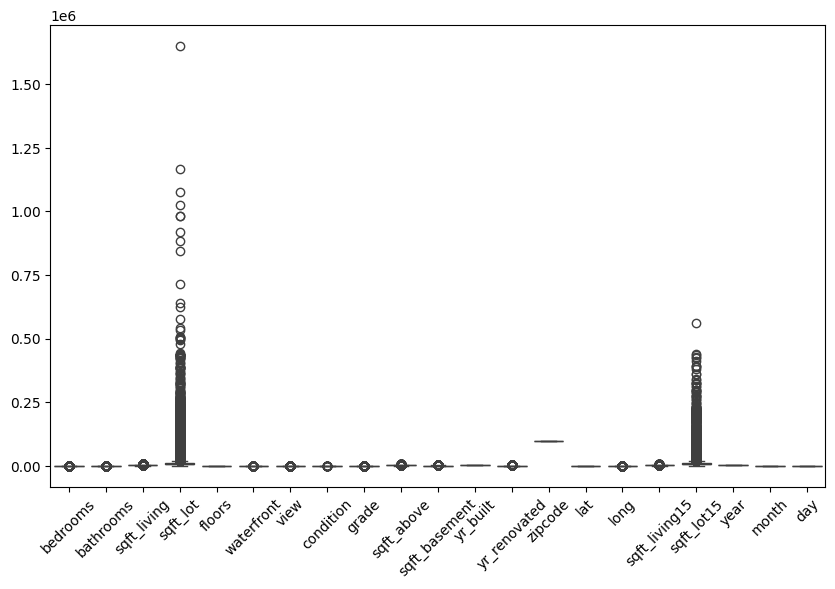

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(df_filtered.drop(columns=['price']))
plt.xticks(rotation=45)
plt.show()

In [33]:
df_filtered = df_filtered[df_filtered['sqft_lot'] <= 600000]

In [34]:
df_filtered.shape

(21317, 22)

In [35]:
df_filtered.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.673197
sqft_living      0.667843
sqft_living15    0.592489
sqft_above       0.569344
bathrooms        0.496333
lat              0.368251
view             0.342465
bedrooms         0.309035
floors           0.274342
sqft_basement    0.273913
waterfront       0.153539
yr_renovated     0.121637
sqft_lot         0.088213
sqft_lot15       0.071159
yr_built         0.055679
condition        0.040016
long             0.031947
year             0.005836
day             -0.013290
month           -0.014500
zipcode         -0.040068
Name: price, dtype: float64

### Price heavily depends on the following data:
- sqft_living      0.701917
- grade            0.667951
- sqft_above       0.605368
- sqft_living15    0.585241
- bathrooms        0.525906
- view             0.397370
- sqft_basement    0.323799
- bedrooms         0.308787
- lat              0.306692
- waterfront       0.266398
- floors           0.256804

### I will use scatter plot to know about this more

<Axes: xlabel='price', ylabel='sqft_living'>

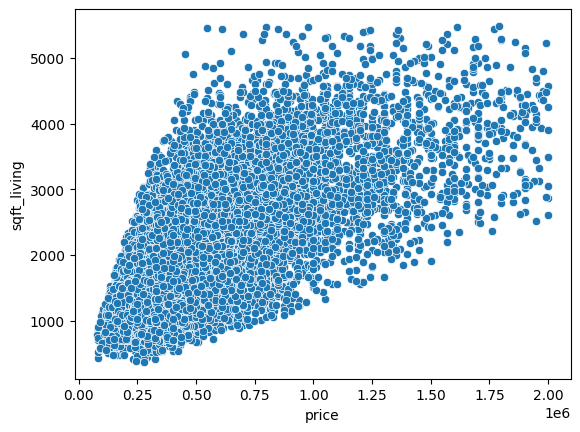

In [36]:
sns.scatterplot(x='price', y='sqft_living', data=df_filtered)

<Axes: xlabel='grade', ylabel='count'>

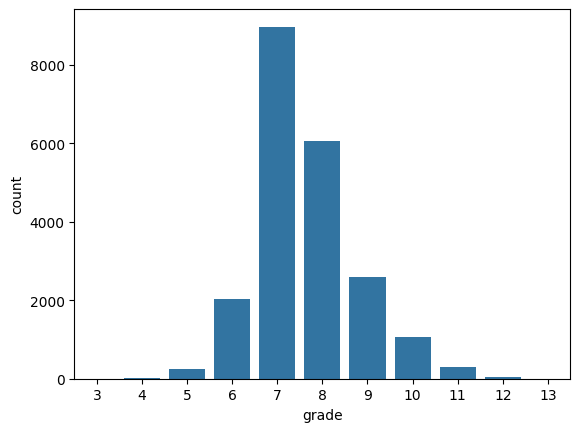

In [37]:
sns.countplot(x='grade', data=df_filtered)

<Axes: xlabel='price', ylabel='sqft_above'>

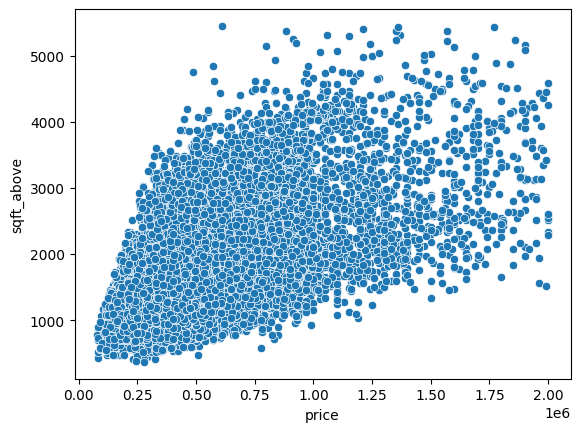

In [38]:
sns.scatterplot(x='price', y='sqft_above', data=df_filtered)

<Axes: xlabel='price', ylabel='sqft_living15'>

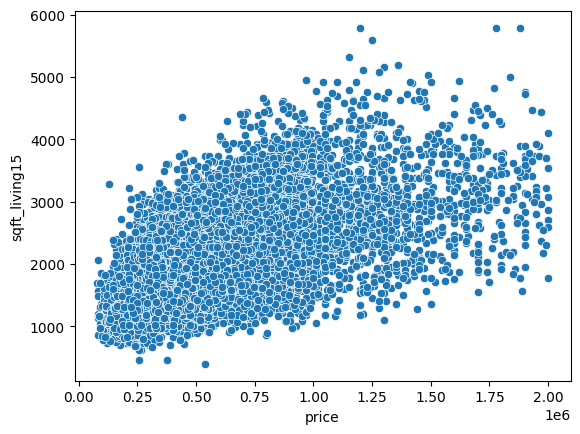

In [39]:
sns.scatterplot(x='price', y='sqft_living15', data=df_filtered)

<Axes: xlabel='long', ylabel='lat'>

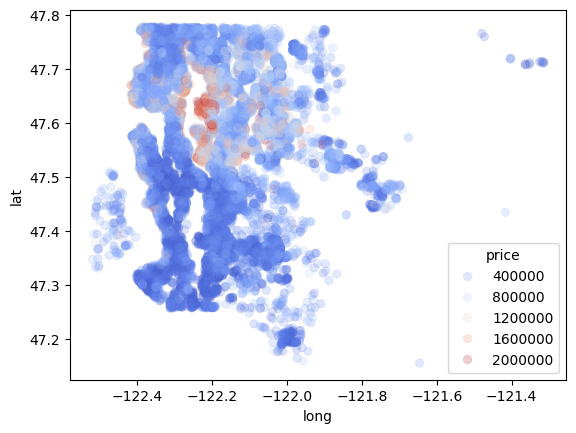

In [40]:
sns.scatterplot(x='long', y='lat', data=df_filtered, hue='price', palette='coolwarm', alpha=0.2, ec=None)

<Axes: xlabel='month'>

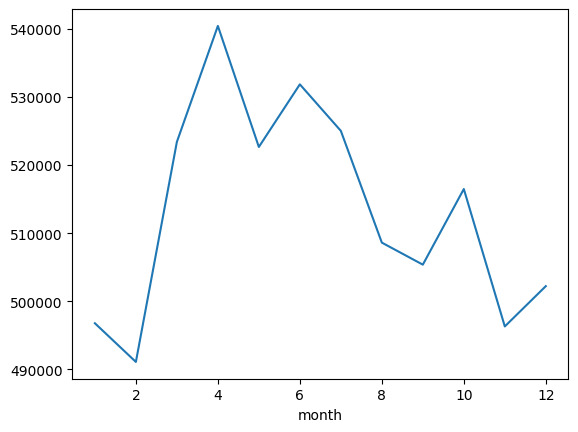

In [41]:
df_filtered.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

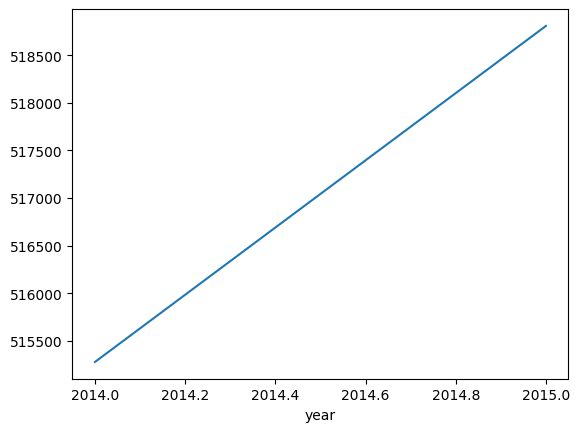

In [42]:
df_filtered.groupby('year').mean()['price'].plot()

<Axes: xlabel='grade'>

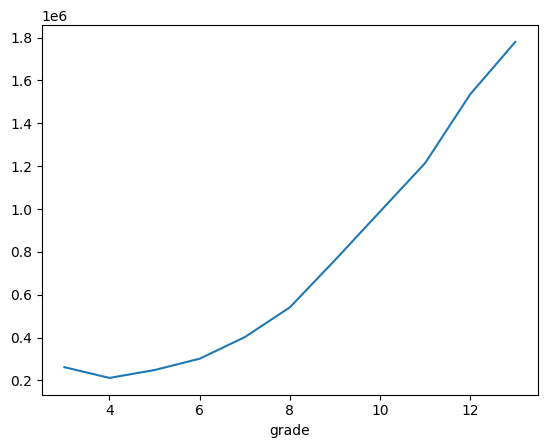

In [43]:
df_filtered.groupby('grade').mean()['price'].plot()

<Axes: xlabel='sqft_living'>

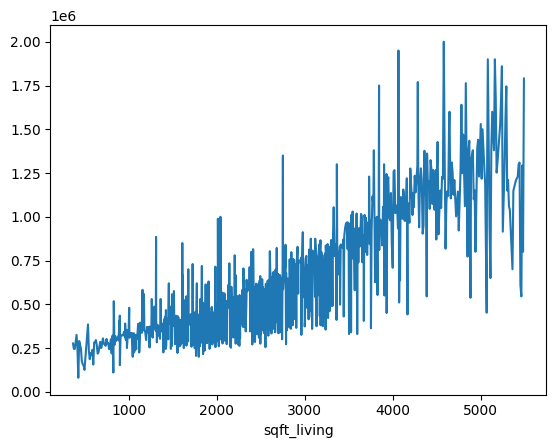

In [44]:
df_filtered.groupby('sqft_living').mean()['price'].plot()

<Axes: xlabel='zipcode'>

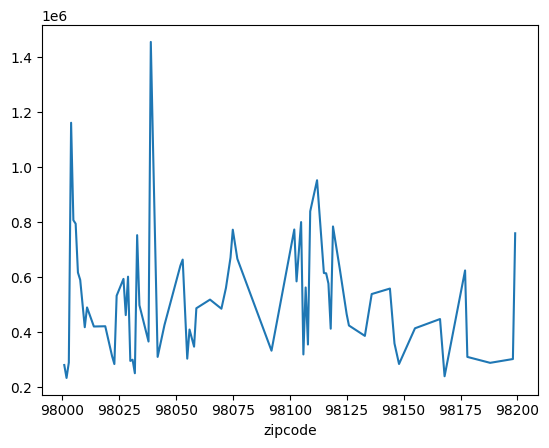

In [45]:
df_filtered.groupby('zipcode').mean()['price'].plot()

In [46]:
df_filtered.drop(columns=['zipcode'], inplace=True)

In [47]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21317 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21317 non-null  float32
 1   bedrooms       21317 non-null  int32  
 2   bathrooms      21317 non-null  float32
 3   sqft_living    21317 non-null  int32  
 4   sqft_lot       21317 non-null  int32  
 5   floors         21317 non-null  float32
 6   waterfront     21317 non-null  int32  
 7   view           21317 non-null  int32  
 8   condition      21317 non-null  int32  
 9   grade          21317 non-null  int32  
 10  sqft_above     21317 non-null  int32  
 11  sqft_basement  21317 non-null  int32  
 12  yr_built       21317 non-null  int32  
 13  yr_renovated   21317 non-null  int32  
 14  lat            21317 non-null  float64
 15  long           21317 non-null  float64
 16  sqft_living15  21317 non-null  int32  
 17  sqft_lot15     21317 non-null  int32  
 18  year       

In [48]:
df_filtered['yr_renovated'].value_counts()

yr_renovated
0       20436
2014       91
2013       36
2007       34
2005       34
        ...  
1948        1
1959        1
1954        1
1934        1
1944        1
Name: count, Length: 70, dtype: int64

In [49]:
df_filtered['yr_built'].value_counts()

yr_built
2014    551
2006    441
2005    441
2004    420
2003    414
       ... 
1901     29
1933     28
1902     27
1935     23
1934     20
Name: count, Length: 116, dtype: int64

In [50]:
df_filtered['sqft_basement'].value_counts()

sqft_basement
0       13028
600       219
500       214
700       214
800       205
        ...  
415         1
2200        1
2010        1
588         1
248         1
Name: count, Length: 280, dtype: int64

# Model Building

In [51]:
from sklearn.model_selection import train_test_split

### Using Regular models

In [52]:
X = df_filtered.drop(columns=['price'])
y = df_filtered['price']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics

In [55]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
knn = KNeighborsRegressor()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

In [56]:
pipelines = {
    'lr': Pipeline([('regressor', LinearRegression())]),
    'ridge': Pipeline([('regressor', Ridge())]),
    'lasso': Pipeline([('regressor', Lasso())]),
    'knn': Pipeline([('regressor', KNeighborsRegressor())]),
    'decision_tree': Pipeline([('regressor', DecisionTreeRegressor())]),
    'random_forest': Pipeline([('regressor', RandomForestRegressor(random_state=42))])
}

In [57]:
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    print(f"Model {name} trained.")

Model lr trained.
Model ridge trained.


C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.551e+14, tolerance: 1.178e+11
  model = cd_fast.enet_coordinate_descent(


Model lasso trained.
Model knn trained.
Model decision_tree trained.
Model random_forest trained.


In [58]:
for name, pipeline in pipelines.items():
    pred = pipeline.predict(X_test)
    print(f"Model {name} = {pred}.")

Model lr = [681823.03787743 388824.62342034 302774.95644951 ... 549931.36373013
 717509.00053746 312944.16605274].
Model ridge = [681687.06190673 389037.27561547 302907.97850622 ... 549876.239627
 717651.28408276 313121.24879937].
Model lasso = [681809.26692273 388835.28248821 302777.9770834  ... 549934.97005819
 717512.20816903 312956.38927445].
Model knn = [584390. 368227. 252800. ... 648490. 836500. 389200.].
Model decision_tree = [590000. 365500. 315000. ... 571500. 557500. 425000.].
Model random_forest = [734680.54 354924.6  309221.   ... 572969.   780586.   330839.6 ].


In [59]:
results = []

# Loop through each model, make predictions, and compute metrics
for name, pipeline in pipelines.items():
    y_pred = pipeline.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Append the results as a dictionary to the list
    results.append({'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

           Model            MAE           MSE           RMSE
0             lr  107291.054844  2.411789e+10  155299.356034
1          ridge  107281.563228  2.411707e+10  155296.723879
2          lasso  107290.480477  2.411788e+10  155299.328434
3            knn  145719.562500  4.344849e+10  208443.015625
4  decision_tree   92668.538931  2.164838e+10  147133.870949
5  random_forest   64613.984604  1.083647e+10  104098.380944


In [175]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13


In [176]:
h = df_filtered.iloc[0]

In [177]:
h_reshaped = h.values.reshape(1, -1)

# Initialize an empty list to store predictions
predictions = []

# Loop through each model, make predictions for h, and store the results
for name, pipeline in pipelines.items():
    pred = pipeline.predict(h_reshaped)
    # Since the target was log-transformed, apply np.exp to get the original scale
    pred_original_scale = pred
    predictions.append({'Model': name, 'Predicted Cost': pred_original_scale[0]})

# Convert the list of predictions to a DataFrame
predictions_df = pd.DataFrame(predictions)

# Display the DataFrame
print(predictions_df)

           Model  Predicted Cost
0             lr   274151.708567
1          ridge   274264.232575
2          lasso   274158.865361
3            knn   369670.000000
4  decision_tree   221900.000000
5  random_forest   234599.000000


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warn

# Deep Learning Approach

### Model Building

In [91]:
X = df_filtered.drop(columns=['price']).values
y = df_filtered['price'].values

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scalar = MinMaxScaler()

In [95]:
X_train = scalar.fit_transform(X_train)

In [96]:
X_test = scalar.transform(X_test)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [98]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

### Model Training and Testing

In [99]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=32, epochs=400)

Epoch 1/400
467/467 [==============================] - 2s 2ms/step - loss: 192874299392.0000 - val_loss: 54023090176.0000
Epoch 2/400
467/467 [==============================] - 1s 1ms/step - loss: 47044542464.0000 - val_loss: 43960320000.0000
Epoch 3/400
467/467 [==============================] - 1s 1ms/step - loss: 37633748992.0000 - val_loss: 35125534720.0000
Epoch 4/400
467/467 [==============================] - 1s 2ms/step - loss: 30823778304.0000 - val_loss: 30268004352.0000
Epoch 5/400
467/467 [==============================] - 1s 1ms/step - loss: 27689005056.0000 - val_loss: 28199452672.0000
Epoch 6/400
467/467 [==============================] - 1s 1ms/step - loss: 26103717888.0000 - val_loss: 26607517696.0000
Epoch 7/400
467/467 [==============================] - 1s 2ms/step - loss: 25067175936.0000 - val_loss: 25786703872.0000
Epoch 8/400
467/467 [==============================] - 1s 1ms/step - loss: 24426260480.0000 - val_loss: 25246543872.0000
Epoch 9/400
467/467 [==========

467/467 [==============================] - 1s 2ms/step - loss: 19910971392.0000 - val_loss: 21163380736.0000
Epoch 69/400
467/467 [==============================] - 1s 2ms/step - loss: 19845408768.0000 - val_loss: 20872898560.0000
Epoch 70/400
467/467 [==============================] - 1s 2ms/step - loss: 19867838464.0000 - val_loss: 20832114688.0000
Epoch 71/400
467/467 [==============================] - 1s 2ms/step - loss: 19814866944.0000 - val_loss: 20830840832.0000
Epoch 72/400
467/467 [==============================] - 1s 2ms/step - loss: 19707729920.0000 - val_loss: 21106972672.0000
Epoch 73/400
467/467 [==============================] - 1s 2ms/step - loss: 19754395648.0000 - val_loss: 20774473728.0000
Epoch 74/400
467/467 [==============================] - 1s 2ms/step - loss: 19733317632.0000 - val_loss: 20838221824.0000
Epoch 75/400
467/467 [==============================] - 1s 2ms/step - loss: 19617202176.0000 - val_loss: 20740718592.0000
Epoch 76/400
467/467 [===============

Epoch 135/400
467/467 [==============================] - 1s 2ms/step - loss: 18623162368.0000 - val_loss: 20334790656.0000
Epoch 136/400
467/467 [==============================] - 1s 2ms/step - loss: 18613282816.0000 - val_loss: 20157075456.0000
Epoch 137/400
467/467 [==============================] - 1s 3ms/step - loss: 18633146368.0000 - val_loss: 20052189184.0000
Epoch 138/400
467/467 [==============================] - 1s 3ms/step - loss: 18570614784.0000 - val_loss: 20161685504.0000
Epoch 139/400
467/467 [==============================] - 1s 2ms/step - loss: 18566092800.0000 - val_loss: 20187500544.0000
Epoch 140/400
467/467 [==============================] - 1s 2ms/step - loss: 18571462656.0000 - val_loss: 20284186624.0000
Epoch 141/400
467/467 [==============================] - 1s 2ms/step - loss: 18582953984.0000 - val_loss: 20171261952.0000
Epoch 142/400
467/467 [==============================] - 1s 2ms/step - loss: 18615840768.0000 - val_loss: 19984261120.0000
Epoch 143/400
46

467/467 [==============================] - 1s 2ms/step - loss: 18410383360.0000 - val_loss: 19863197696.0000
Epoch 202/400
467/467 [==============================] - 1s 2ms/step - loss: 18336063488.0000 - val_loss: 19860844544.0000
Epoch 203/400
467/467 [==============================] - 1s 2ms/step - loss: 18318733312.0000 - val_loss: 19886747648.0000
Epoch 204/400
467/467 [==============================] - 1s 2ms/step - loss: 18356072448.0000 - val_loss: 19911854080.0000
Epoch 205/400
467/467 [==============================] - 1s 2ms/step - loss: 18312105984.0000 - val_loss: 20607477760.0000
Epoch 206/400
467/467 [==============================] - 1s 2ms/step - loss: 18291183616.0000 - val_loss: 20292321280.0000
Epoch 207/400
467/467 [==============================] - 1s 2ms/step - loss: 18266632192.0000 - val_loss: 19872110592.0000
Epoch 208/400
467/467 [==============================] - 1s 2ms/step - loss: 18256394240.0000 - val_loss: 20037040128.0000
Epoch 209/400
467/467 [=======

467/467 [==============================] - 1s 2ms/step - loss: 18147184640.0000 - val_loss: 19837947904.0000
Epoch 268/400
467/467 [==============================] - 1s 2ms/step - loss: 18134210560.0000 - val_loss: 19822227456.0000
Epoch 269/400
467/467 [==============================] - 1s 2ms/step - loss: 18143055872.0000 - val_loss: 19890464768.0000
Epoch 270/400
467/467 [==============================] - 1s 2ms/step - loss: 18154401792.0000 - val_loss: 19918569472.0000
Epoch 271/400
467/467 [==============================] - 1s 2ms/step - loss: 18181093376.0000 - val_loss: 19950573568.0000
Epoch 272/400
467/467 [==============================] - 1s 2ms/step - loss: 18207344640.0000 - val_loss: 19959582720.0000
Epoch 273/400
467/467 [==============================] - 1s 2ms/step - loss: 18156894208.0000 - val_loss: 20153198592.0000
Epoch 274/400
467/467 [==============================] - 1s 2ms/step - loss: 18137300992.0000 - val_loss: 19824726016.0000
Epoch 275/400
467/467 [=======

467/467 [==============================] - 1s 2ms/step - loss: 15309333504.0000 - val_loss: 16798678016.0000
Epoch 334/400
467/467 [==============================] - 1s 2ms/step - loss: 15000638464.0000 - val_loss: 16831378432.0000
Epoch 335/400
467/467 [==============================] - 1s 2ms/step - loss: 14884577280.0000 - val_loss: 16365618176.0000
Epoch 336/400
467/467 [==============================] - 1s 2ms/step - loss: 14608576512.0000 - val_loss: 16186491904.0000
Epoch 337/400
467/467 [==============================] - 1s 2ms/step - loss: 14499743744.0000 - val_loss: 16296238080.0000
Epoch 338/400
467/467 [==============================] - 1s 2ms/step - loss: 14348425216.0000 - val_loss: 15716134912.0000
Epoch 339/400
467/467 [==============================] - 1s 2ms/step - loss: 14164519936.0000 - val_loss: 15707639808.0000
Epoch 340/400
467/467 [==============================] - 1s 2ms/step - loss: 14013995008.0000 - val_loss: 15481180160.0000
Epoch 341/400
467/467 [=======

467/467 [==============================] - 1s 2ms/step - loss: 11182813184.0000 - val_loss: 12668685312.0000
Epoch 400/400
467/467 [==============================] - 1s 2ms/step - loss: 11154932736.0000 - val_loss: 12752689152.0000


In [100]:
losses = pd.DataFrame(model.history.history)

<Axes: >

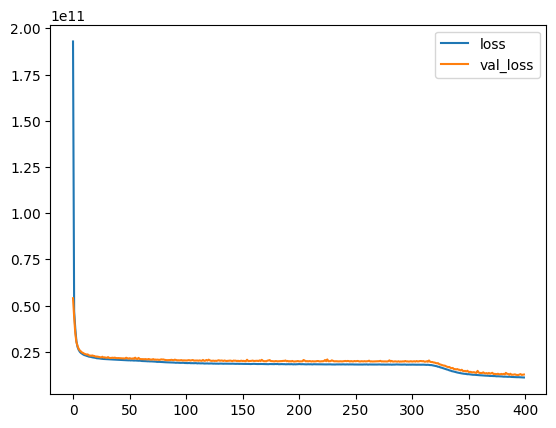

In [101]:
losses.plot()

In [102]:
predict = model.predict(X_test)

200/200 [==============================] - 0s 809us/step


### Model Evaluation

In [103]:
print('MAE', metrics.mean_absolute_error(y_test, predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('Explained Variance', metrics.explained_variance_score(y_test, predict))

MAE 74682.805
RMSE 112927.8
Explained Variance 0.8482340574264526


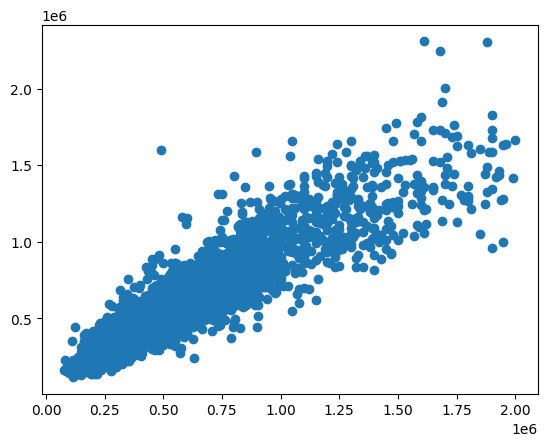

In [106]:
plt.scatter(y_test, predict)

In [142]:
sh = scalar.transform(df_filtered.iloc[0].values.reshape(-1,20))

In [143]:
model.predict(sh)

1/1 [==============================] - 0s 21ms/step


array([[269212.1]], dtype=float32)

In [147]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13


# Result and Comparison

> Actual Cost: 221900.0

___
>
>| Model               | Predicted Cost |
|:--------------------|:---------------|
| Decision Tree       | 221900.00      |
| Random Forest       | 234599.00      |
| Deep Learning Model | 269212.10      |
| Lasso               | 274158.87      |
| Linear Regression   | 274151.71      |
| Ridge               | 274264.23      |
| KNN                 | 369670.00      |

___

> Decision Tree is most accurate model yet